Stock Market Performance Analysis involves calculating  

1.   Moving averages
2.   Volatility
3.   Corelation

to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [3]:
start_date=datetime.now()-pd.DateOffset(months=3)
end_date=datetime.now()

tickers=['AAPL', 'MSFT', 'NFLX','GOOGL']
df_list=[]

for ticker in tickers:
  data=yf.download(ticker, start=start_date, end=end_date)
  df_list.append(data)

df=pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2024-04-15  175.360001  176.630005  172.500000  172.690002  172.456085   
       2024-04-16  171.750000  173.759995  168.270004  169.380005  169.150574   
       2024-04-17  169.610001  170.649994  168.000000  168.000000  167.772446   
       2024-04-18  168.029999  168.639999  166.550003  167.039993  166.813736   
       2024-04-19  166.210007  166.399994  164.080002  165.000000  164.776505   

                     Volume  
Ticker Date                  
AAPL   2024-04-15  73531800  
       2024-04-16  73711200  
       2024-04-17  50901200  
       2024-04-18  43122900  
       2024-04-19  67772100

In [4]:
df=df.reset_index()
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2024-04-15,175.360001,176.630005,172.500000,172.690002,172.456085,73531800
1,AAPL,2024-04-16,171.750000,173.759995,168.270004,169.380005,169.150574,73711200
2,AAPL,2024-04-17,169.610001,170.649994,168.000000,168.000000,167.772446,50901200
3,AAPL,2024-04-18,168.029999,168.639999,166.550003,167.039993,166.813736,43122900
4,AAPL,2024-04-19,166.210007,166.399994,164.080002,165.000000,164.776505,67772100


Lets look at the performance  

(we are using plotly instead of Matplotlib becuase of its interactivty)

In [5]:
import plotly.express as px
fig=px.line(df,x='Date', y='Close', color='Ticker')
fig.show()

To compare the performance of different companies and identify similarities or differences in their stock price movements

In [9]:
fig=px.area(df, x='Date', y='Close', color='Ticker',
            facet_col='Ticker',
            labels={'Date':'Date', 'Close':'Closing Price', 'Ticker': 'Company'})

fig.show()

Moving Average calculation

In [10]:
df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)

df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

In [22]:
for i, group in df.groupby('Ticker'):
  print(f'Moving average of {i}')
  print(group[['MA10', 'MA20']])

Moving average of AAPL
          MA10        MA20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
57  216.791002  212.650001
58  218.845001  214.239500
59  221.236000  216.232500
60  222.668001  217.253501
61  224.312000  218.127000

[62 rows x 2 columns]
Moving average of GOOGL
           MA10        MA20
186         NaN         NaN
187         NaN         NaN
188         NaN         NaN
189         NaN         NaN
190         NaN         NaN
..          ...         ...
243  184.837003  180.623001
244  185.813002  181.349001
245  186.528001  182.157500
246  186.697002  182.605001
247  186.663002  182.969002

[62 rows x 2 columns]
Moving average of MSFT
           MA10        MA20
62          NaN         NaN
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
..          ...         ...
119  456.116003  448.048001


In [23]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'],
                  title=f"{ticker} Moving Averages")
    fig.show()

When the MA10 crosses above the MA20, it is considered a bullish signal indicating that the stock price will continue to rise. Conversely, when the MA10 crosses below the MA20, it is a bearish signal that the stock price will continue falling

Analyse the volatility

In [24]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility',
              color='Ticker',
              title='Volatility of All Companies')
fig.show()

High volatility indicates that the stock or market experiences large and frequent price movements, while low volatility indicates that the market experiences smaller or less frequent price movements.

Correlation Matrix

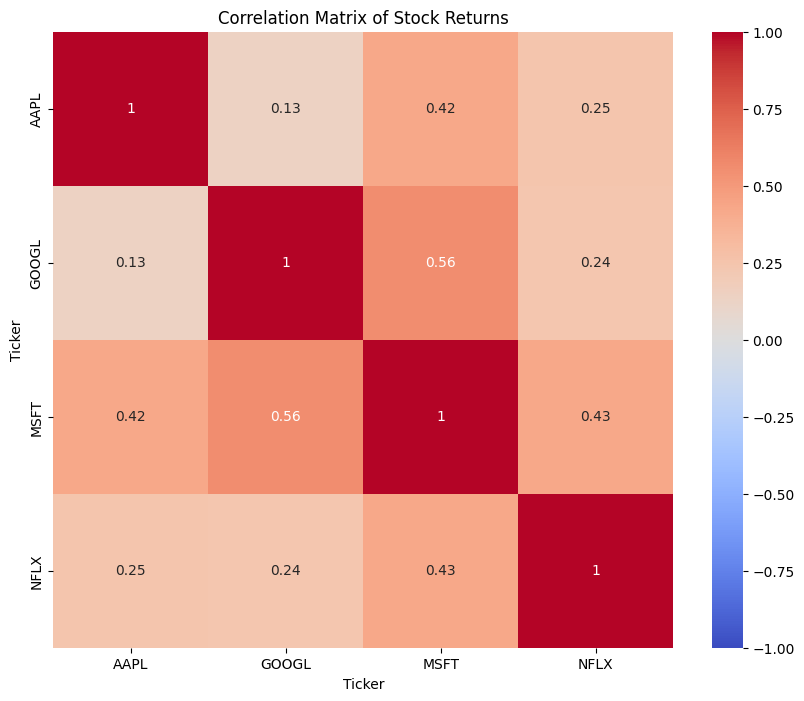

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()
correlation = returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Returns')
plt.show()

For investors, the sign of a strong correlation or similarity may indicate an opportunity to diversify their portfolio by investing in both companies, as both stocks may offer similar potential returns and risks.